# Netflix Data Analysis

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns

### Get to know the datas

In [3]:
df = pd.read_csv("netflix_titles.csv")
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

Checking the size of the dataset

In [4]:
df.shape

(7787, 12)

Check if there is any duplicated records

In [5]:
df.duplicated().any()

False

Look at some basic information of the dataset, and we can see 11 of the datatype are object and 1 is integer.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Number of unique data for each column

In [7]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

Percentage of unique data for each column

In [8]:
df.nunique() / df.shape[0] * 100

show_id         100.000000
type              0.025684
title           100.000000
director         51.996918
cast             87.723128
country           8.745345
date_added       20.097599
release_year      0.937460
rating            0.179787
duration          2.773854
listed_in         6.318223
description      99.768846
dtype: float64

Checking for missing / null value for each column. Director, cast, country, date_added, rating have missing values

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

A heatmap showing the missing values

<AxesSubplot:>

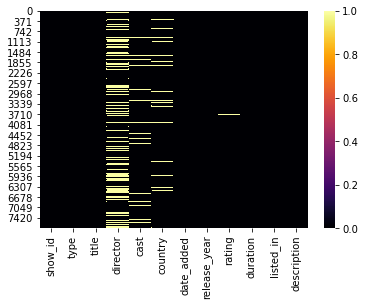

In [10]:
sns.heatmap(df.isnull(),cmap = 'inferno')

Check the percentage of missing values for each column.
- director: This column can be deleted since it has about 30% missing values and about 52% of unique data, hence it does not provide much information for our analysis. However, it will be important for recommender system 
- cast: This column can be deleted too since it has about 9% missing values and about 88% of unique data, hence is also does not provide significant information for analysis. However, it will be important for recommender system 
- country: We replace the missing values with 'United States' since Netflix is originated from United States and most of the movies and TV shows are aired in there. Statistically, looking at the mode of the country column also confirm that 'United States' can be a great replacement for the missing values. 
- date_added:  Since the missing number is small, we can either delete of the missing rows or we can use a little effort to scrape the data from the Internet. 
- rating: Since the missing number is small, we can either delete of the missing rows or we can use a little effort to scrape the data from the Internet. 



In [11]:
df.isnull().sum() / df.shape[0] * 100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

### Handling missing data

Deleting 'director' and 'cast' column

In [12]:
df.drop(['director','cast'], axis=1 ,inplace=True)
df.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020          2020   
1      s2    Movie   7:19         Mexico  December 23, 2016          2016   
2      s3    Movie  23:59      Singapore  December 20, 2018          2011   
3      s4    Movie      9  United States  November 16, 2017          2009   
4      s5    Movie     21  United States    January 1, 2020          2008   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   
3  PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13    123 min                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

Filling the missing 'country' value with 'United States'

In [13]:
df['country'].fillna('United States', inplace=True)
df['country'].isnull().any()

False

Since the date_added data for the missing values are not readily avaialble on the Internet, I choose to drop the missing rows.

In [14]:
df.dropna(subset=['date_added'],axis = 0, inplace = True)
df['date_added'].isnull().any()

False

In [15]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
df[df['rating'].isnull()]

show_id     type                                              title  \
67       s68    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
2359   s2360  TV Show                  Gargantia on the Verdurous Planet   
3660   s3661  TV Show                                       Little Lunch   
3736   s3737    Movie                                    Louis C.K. 2017   
3737   s3738    Movie                              Louis C.K.: Hilarious   
3738   s3739    Movie               Louis C.K.: Live at the Comedy Store   
4323   s4324    Movie                               My Honor Was Loyalty   

            country          date_added  release_year rating  duration  \
67    United States    January 26, 2017          2017    NaN    37 min   
2359          Japan    December 1, 2016          2013    NaN  1 Season   
3660      Australia    February 1, 2018          2015    NaN  1 Season   
3736  United States       April 4, 2017          2017    NaN    74 min   
3737  United States  September 16, 2016          2010    NaN    84 min   
3738  United States     August 15, 2016          2015    NaN    66 min   
4323          Italy       March 1, 2017          2015    NaN   115 min   

                                 listed_in  \
67                                  Movies   
2359  Anime Series, International TV Shows   
3660                 Kids' TV, TV Comedies   
3736                                Movies   
3737                                Movies   
3738                                Movies   
4323                                Dramas   

                                            description  
67    Oprah Winfrey sits down with director Ava DuVe...  
2359  After falling through a wormhole, a space-dwel...  
3660  Adopting a child's perspective, this show take...  
3736  Louis C.K. muses on religion, eternal love, gi...  
3737  Emmy-winning comedy writer Louis C.K. brings h...  
3738  The comic puts his trademark hilarious/thought...  
4323  Amid the chaos and horror of World War II, a c...

I searched and recorded the rating of the above record from IMDb and Netflix.

In [17]:
rating_replacements = {67: 'TV-PG', 2359: 'TV-14', 3660: 'TV-MA', 3736: 'TV-MA', 3737: 'TV-MA', 3738: 'TV-MA', 4323: 'PG-13'}
for index, rating in rating_replacements.items():
    df.loc[index, 'rating'] = rating
df['rating'].isnull().any()

False

### Adding new features

We can add new features from the date_added column which are month and year. Also, we can split the duration column into season_count and duration.

In [18]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration_in_min'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])

In [19]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings_ages)
df.head()

show_id     type  title        country date_added  release_year rating  \
0      s1  TV Show     3%         Brazil 2020-08-14          2020  TV-MA   
1      s2    Movie   7:19         Mexico 2016-12-23          2016  TV-MA   
2      s3    Movie  23:59      Singapore 2018-12-20          2011      R   
3      s4    Movie      9  United States 2017-11-16          2009  PG-13   
4      s5    Movie     21  United States 2020-01-01          2008  PG-13   

    duration                                          listed_in  \
0  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1     93 min                       Dramas, International Movies   
2     78 min                Horror Movies, International Movies   
3     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4    123 min                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

  season_count duration_in_min principal_country target_ages  
0            4                            Brazil      Adults  
1                           93            Mexico      Adults  
2                           78         Singapore      Adults  
3                           80     United States       Teens  
4                          123     United States       Teens

### Data Visualization

additional: Why did netflix soared? korea
1. Type of content(pie chart)
2. Growth of content over the year(line graphs) kaggle grandmaster
3. Netflix content update by month(heatmap) india girl
4. Rating distribution by content type(donut chart) spanish man
5. Content count of each country(choropleth graph + horizontal bar chart) korea
6. Distribution of content duration (distplot) Kaggle grandmaster
7. Rating distribution countbar with classification(little kids, mature,etc) korea
8. TV Show season countchart
9. Top 10 Genre
10. Rating of content over the year (self!)
11. Country content countbar

In [20]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300 #high resolution
sns.set_style('whitegrid')

#### Content Type

In [21]:
pie_x = df['type'].value_counts().reset_index()
pie_x = pie_x.rename(columns={'index':'type','type':'count'})

trace = go.Pie(labels=pie_x['type'], values=pie_x['count'], pull=[0.05])
layout = go.Layout(title="", height=450, legend=dict(x=0.1, y=1))
fig = go.Figure(data = [trace], layout = layout)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- The movies comprised majority of the content

#### Content added over the years

In [22]:
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]


tv_show_count = tv_show['year_added'].value_counts().reset_index()
tv_show_count = tv_show_count.rename(columns={'index': 'year_added', 'year_added': 'count'})
tv_show_count = tv_show_count.sort_values('year_added')

movie_count = movie['year_added'].value_counts().reset_index()
movie_count = movie_count.rename(columns= {'index': 'year_added', 'year_added': 'count'})
movie_count = movie_count.sort_values('year_added')

trace1 = go.Scatter(x=tv_show_count['year_added'], y=tv_show_count['count'], name="TV Shows")
trace2 = go.Scatter(x=movie_count['year_added'], y=movie_count["count"], name="Movies")
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",xaxis_title='Year',yaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- Initially, the rate of addition of TV shows and movies seems to be at the same pace. 
- From 2016 to 2018, a total of 2377 movies have been added while only 976 TV shows have been added
- In 2020, there is a slight increase in the rate of addition of TV shows and a slight reduction in rate of addition of movies which may be a factor of the COVID-19 pandemic.

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


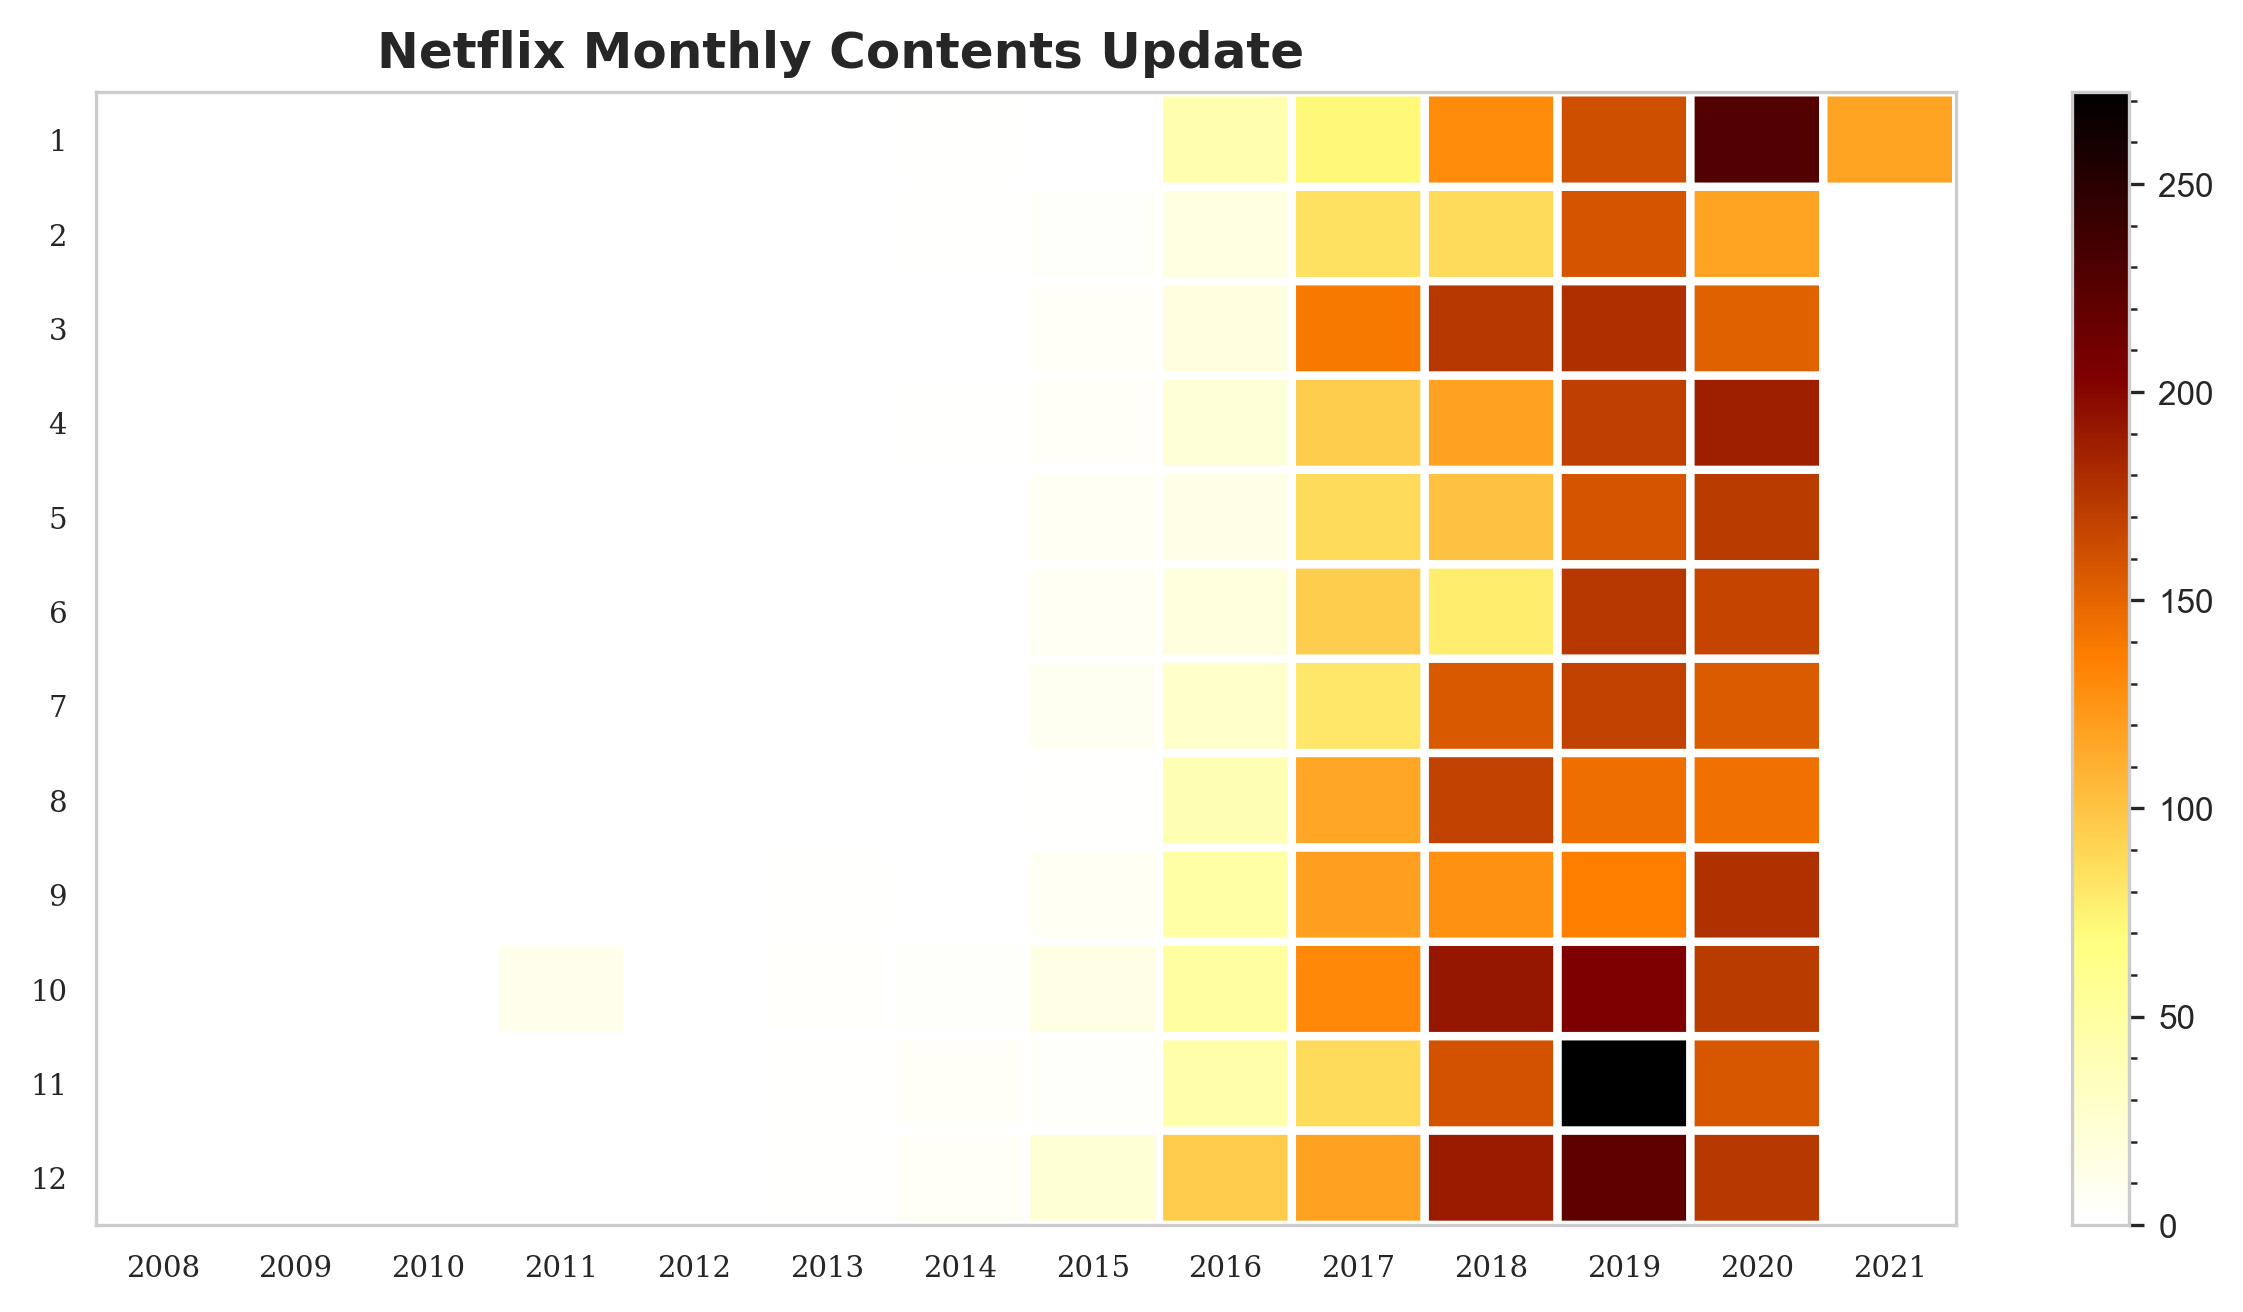

In [23]:

month_order = [1,2,3,4,5,6,7,8,9,10,11,12][::-1]
month_HM = df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 5), dpi=300)
plt.pcolor(month_HM, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(month_HM.columns), 1), month_HM.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(month_HM.index), 1), month_HM.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Monthly Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.40, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()


- This heatmap shows that there are more contents being added during the last few months compare to other months.

In [24]:
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [25]:
movie_rating_df = generate_rating_df(df[df['type'] == 'Movie'])
show_rating_df = generate_rating_df(df[df['type'] == 'TV Show'])

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.20, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

- Movies has about 5.7% more adult content than TV shows.
- TV shows has 30% of content for kids+older kids while movie has only 20%.

In [26]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
m1 = {'rating': 'G', 'count': 0}
m2 = {'rating': 'NC-17', 'count': 0}
m3 = {'rating': 'PG', 'count': 0}
m4 = {'rating': 'PG-13', 'count': 0}
movie = df[df['type'] == 'Movie']
tv_show = df[df['type'] == 'TV Show']
movie_rating = movie['rating'].value_counts()[rating_order]
tv_rating = tv_show['rating'].value_counts().reset_index()
tv_rating = tv_rating.rename(columns={'index': 'rating','rating': 'count'})
tv_rating = tv_rating.append(m1,ignore_index=True)
tv_rating = tv_rating.append(m2,ignore_index=True)
tv_rating = tv_rating.append(m3,ignore_index=True)
tv_rating = tv_rating.append(m4,ignore_index=True)

tv_rating = tv_rating.set_index('rating')
tv_rating = tv_rating.T
tv_rating = tv_rating[rating_order]
tv_rating = tv_rating.iloc[0]


In [27]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

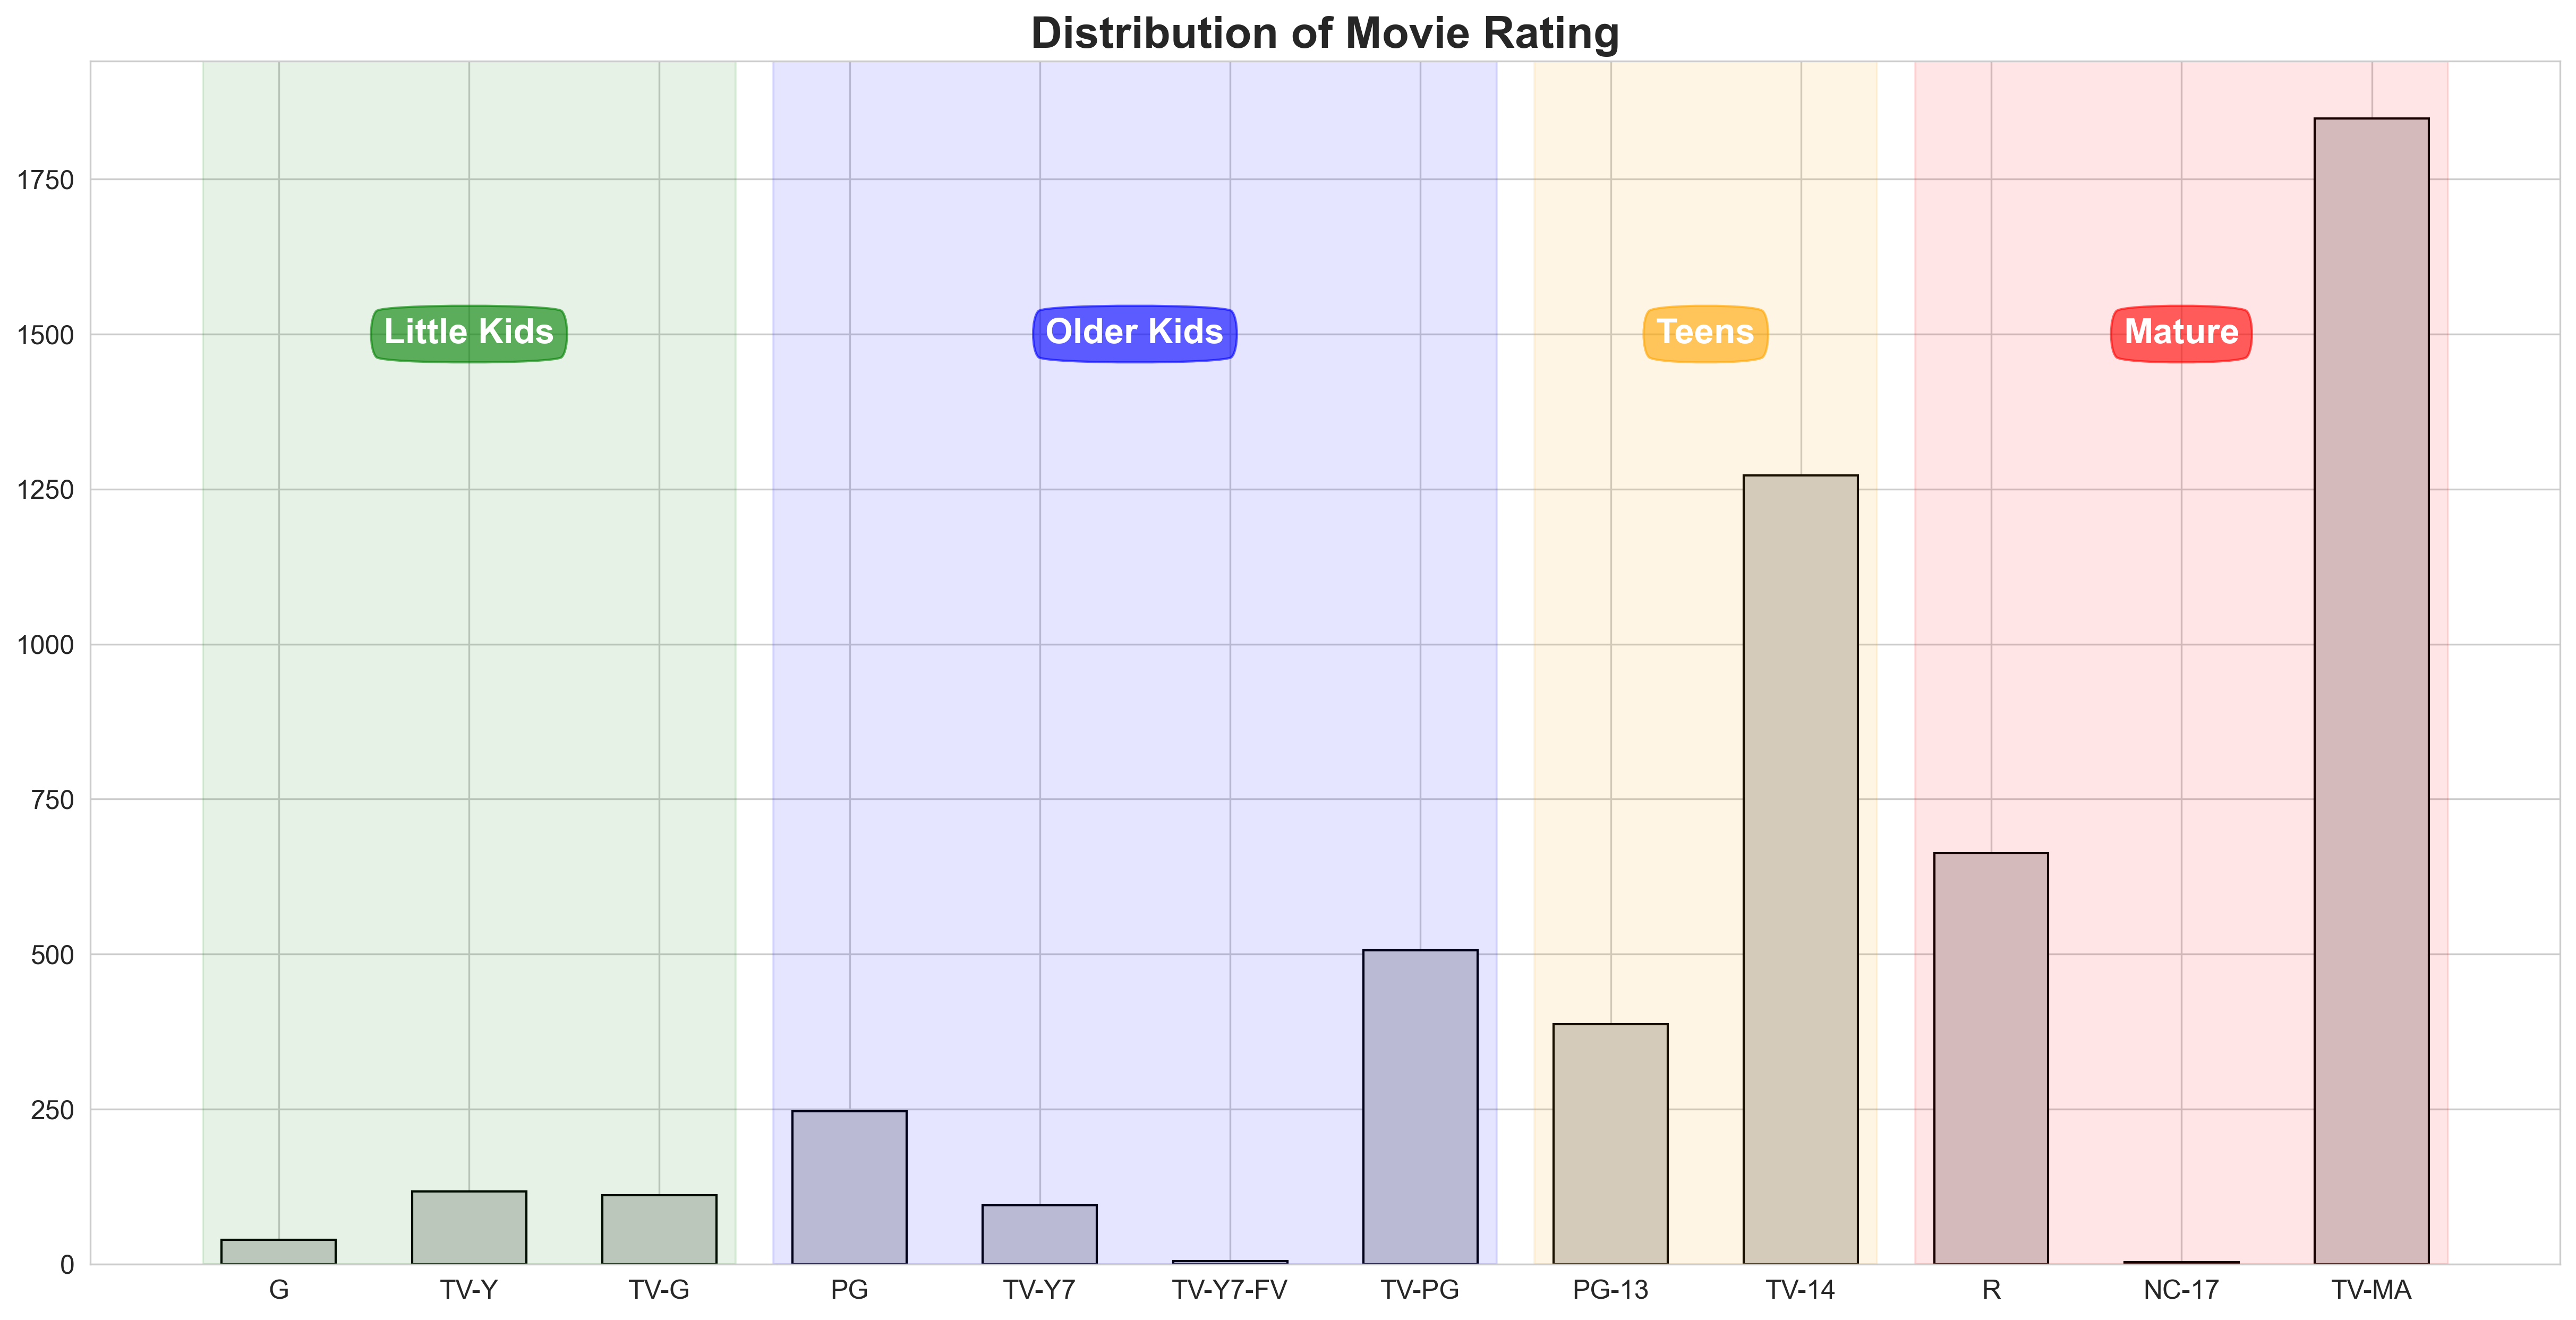

In [28]:
rating_barplot(movie_rating,'Movie', 1500)

- TV-MA is the most popular rating for Mature movie, and for teens movie, TV-14 has about 3 times more than PG-13.


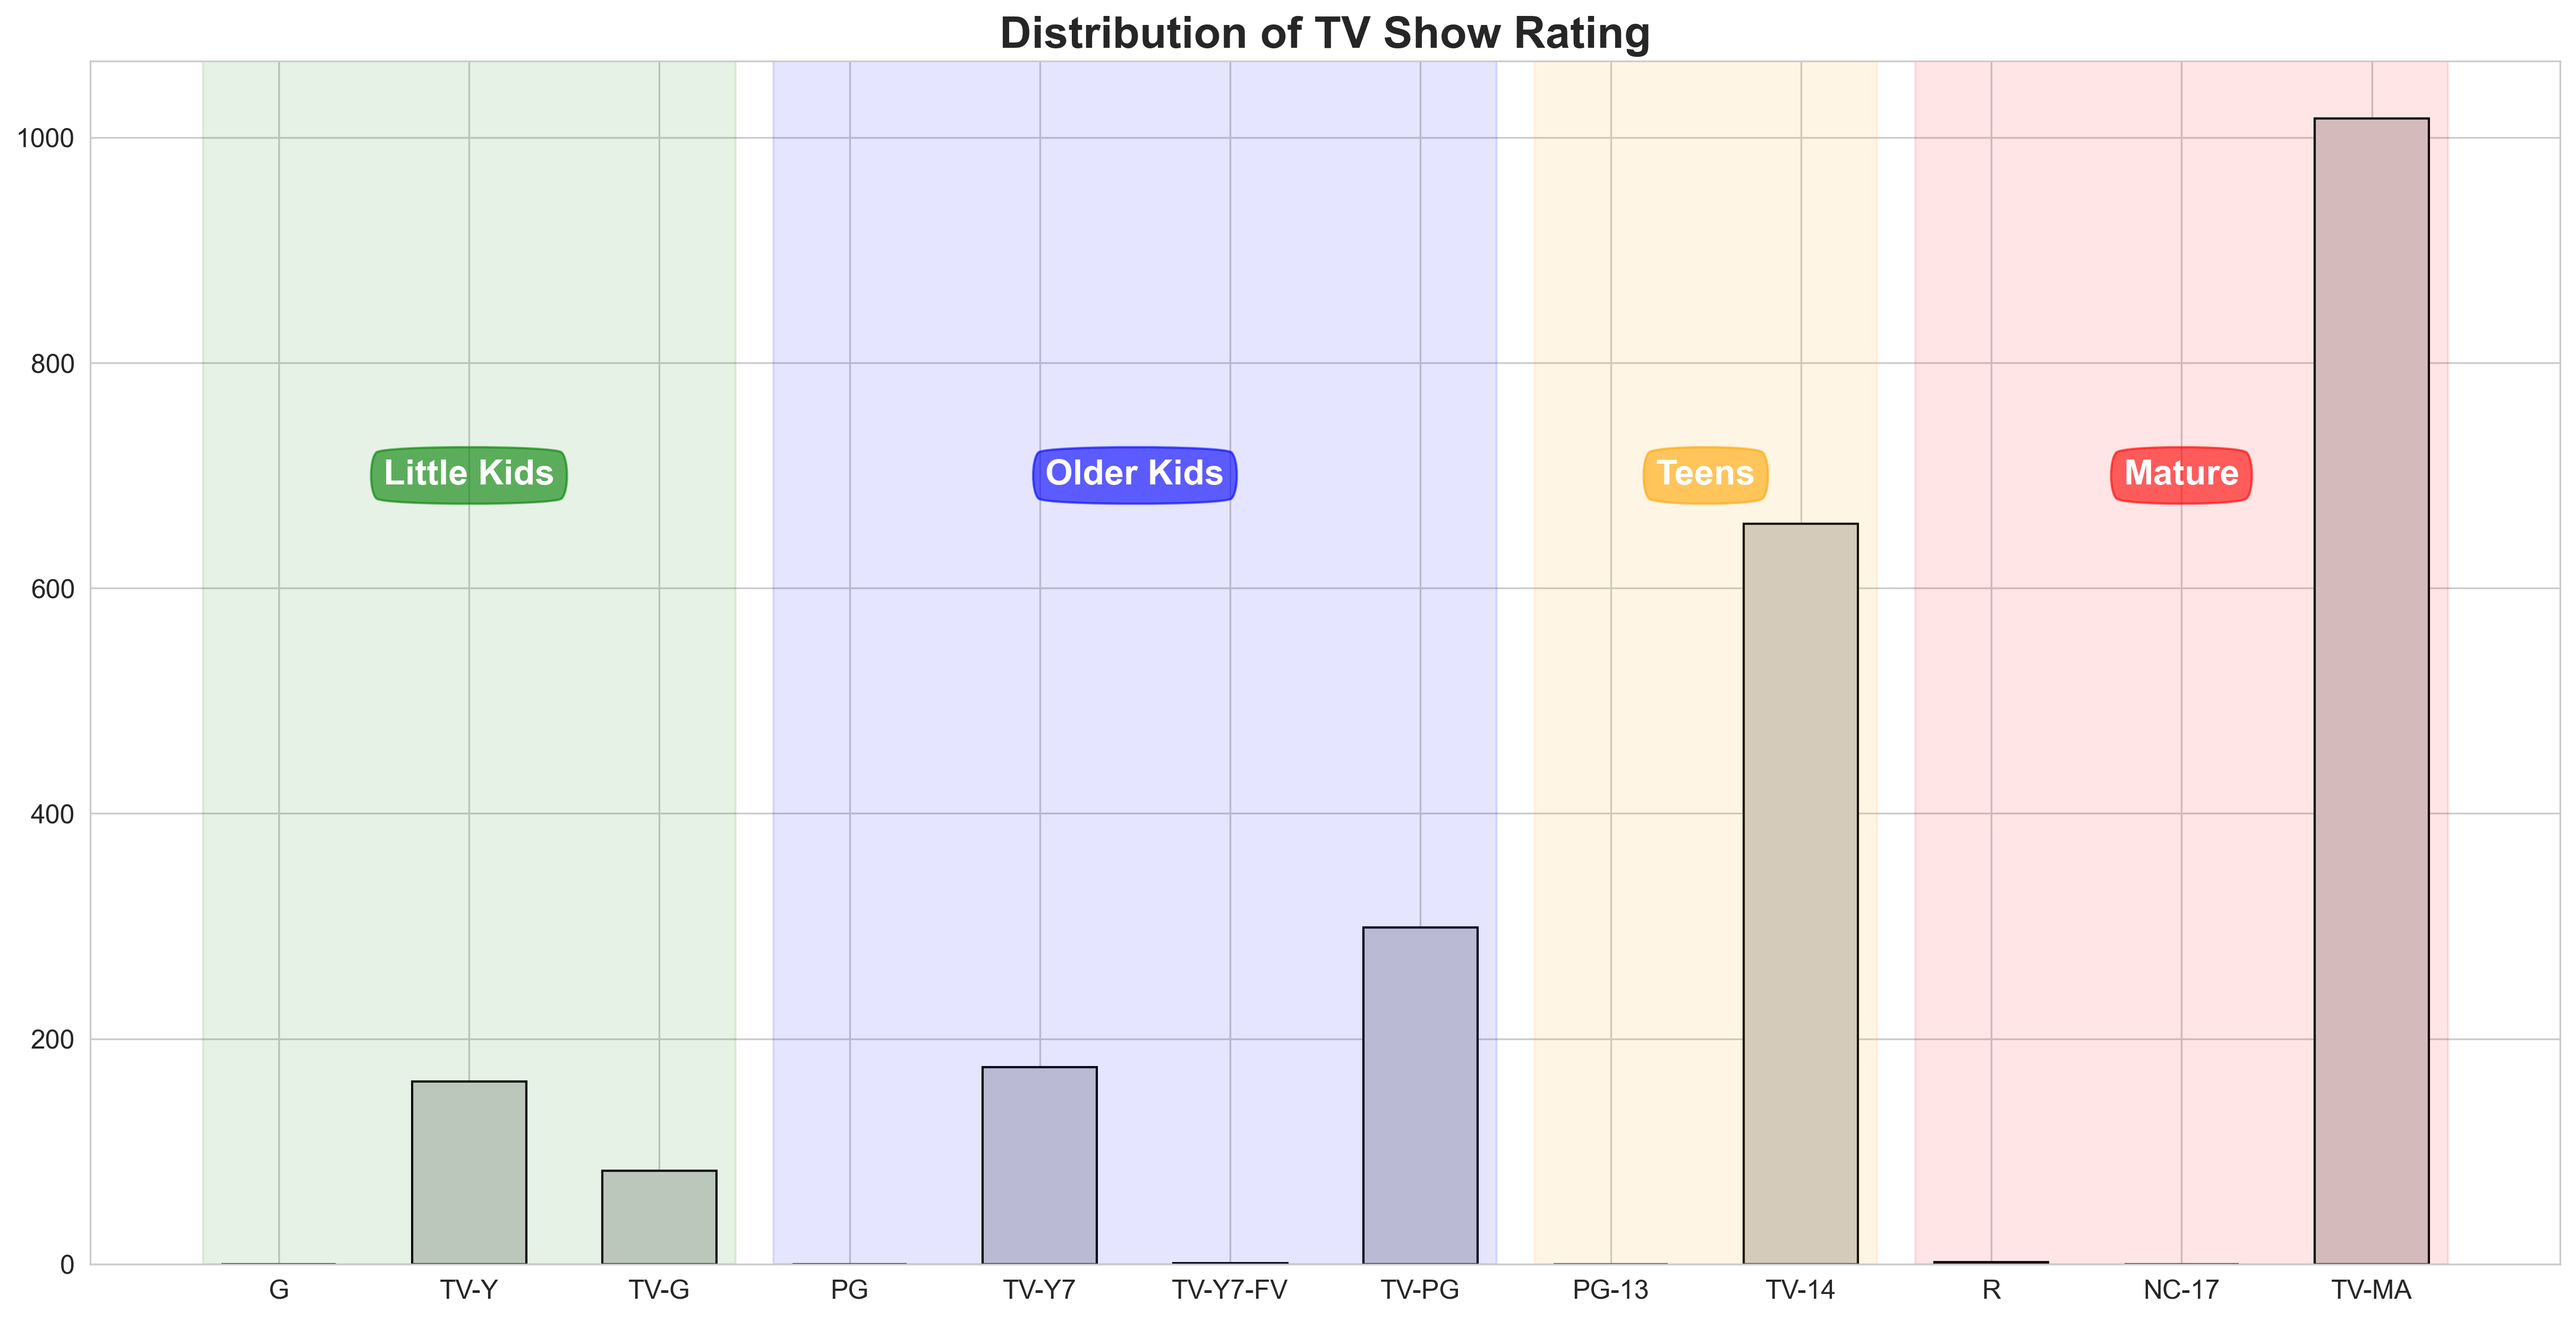

In [29]:
rating_barplot(tv_rating,'TV Show' , 700)

In [30]:
country_df = df['principal_country'].value_counts().reset_index()
country_df = country_df[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]
country_df = country_df.rename(columns={'index': 'country', 'principal_country': 'count'})
country_df = country_df.sort_values('count')

In [31]:
trace1 = go.Bar(y=country_df['country'], x=country_df['count'], orientation="h", name="")

data = [trace1]
layout = go.Layout(title="Countries with most content",xaxis_title='count', height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- United States, India and United Kingdom is the top 3 countries with the most content.

In [32]:
country_df2 = df.groupby(['year_added','principal_country']).agg({'show_id': 'count'}).reset_index()
country_df2['aggregate'] = country_df2.groupby(['principal_country'])['show_id'].cumsum()



In [33]:

# year_country2 = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(country_df2, locations="principal_country", color="aggregate", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Cumulative sum of content over the year by country')
fig.show()

In [34]:
df.dtypes

show_id                      object
type                         object
title                        object
country                      object
date_added           datetime64[ns]
release_year                  int64
rating                       object
duration                     object
listed_in                    object
description                  object
year_added                    int64
month_added                   int64
season_count                 object
duration_in_min              object
principal_country            object
target_ages                  object
dtype: object

In [35]:

x1 = movie['duration_in_min'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], [''], bin_size=0.7, curve_type='normal')
fig.update_layout(title_text='Distplot with Normal Distribution',xaxis_title = 'duration in min', yaxis_title='PDF')
fig.show()

- The duration for movies are distributed normally where the peak are in the range between 90 and 100 minutes.

In [36]:
bar_season = tv_show['season_count'].value_counts().reset_index()
bar_season = bar_season.rename(columns = {'season_count' : "count", "index" : 'season_count'})
bar_season['season_count'] = pd.to_numeric(bar_season['season_count'])
bar_season = bar_season.sort_values('season_count')

trace1 = go.Bar(x=bar_season['season_count'], y=bar_season["count"], name="TV Shows")
data = [trace1]
layout = go.Layout(title="Seasons for TV Show",yaxis_title = 'count',xaxis_title='Number of Seasons', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- Most of the TV show consist of 1 season only

In [37]:
from collections import Counter
col = "listed_in"
categories = ", ".join(movie['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Genre distributions of movies",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [38]:
col = "listed_in"
categories = ", ".join(tv_show['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows")

data = [trace1]
layout = go.Layout(title="Genre distributions of TV Show",xaxis_title='count', legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

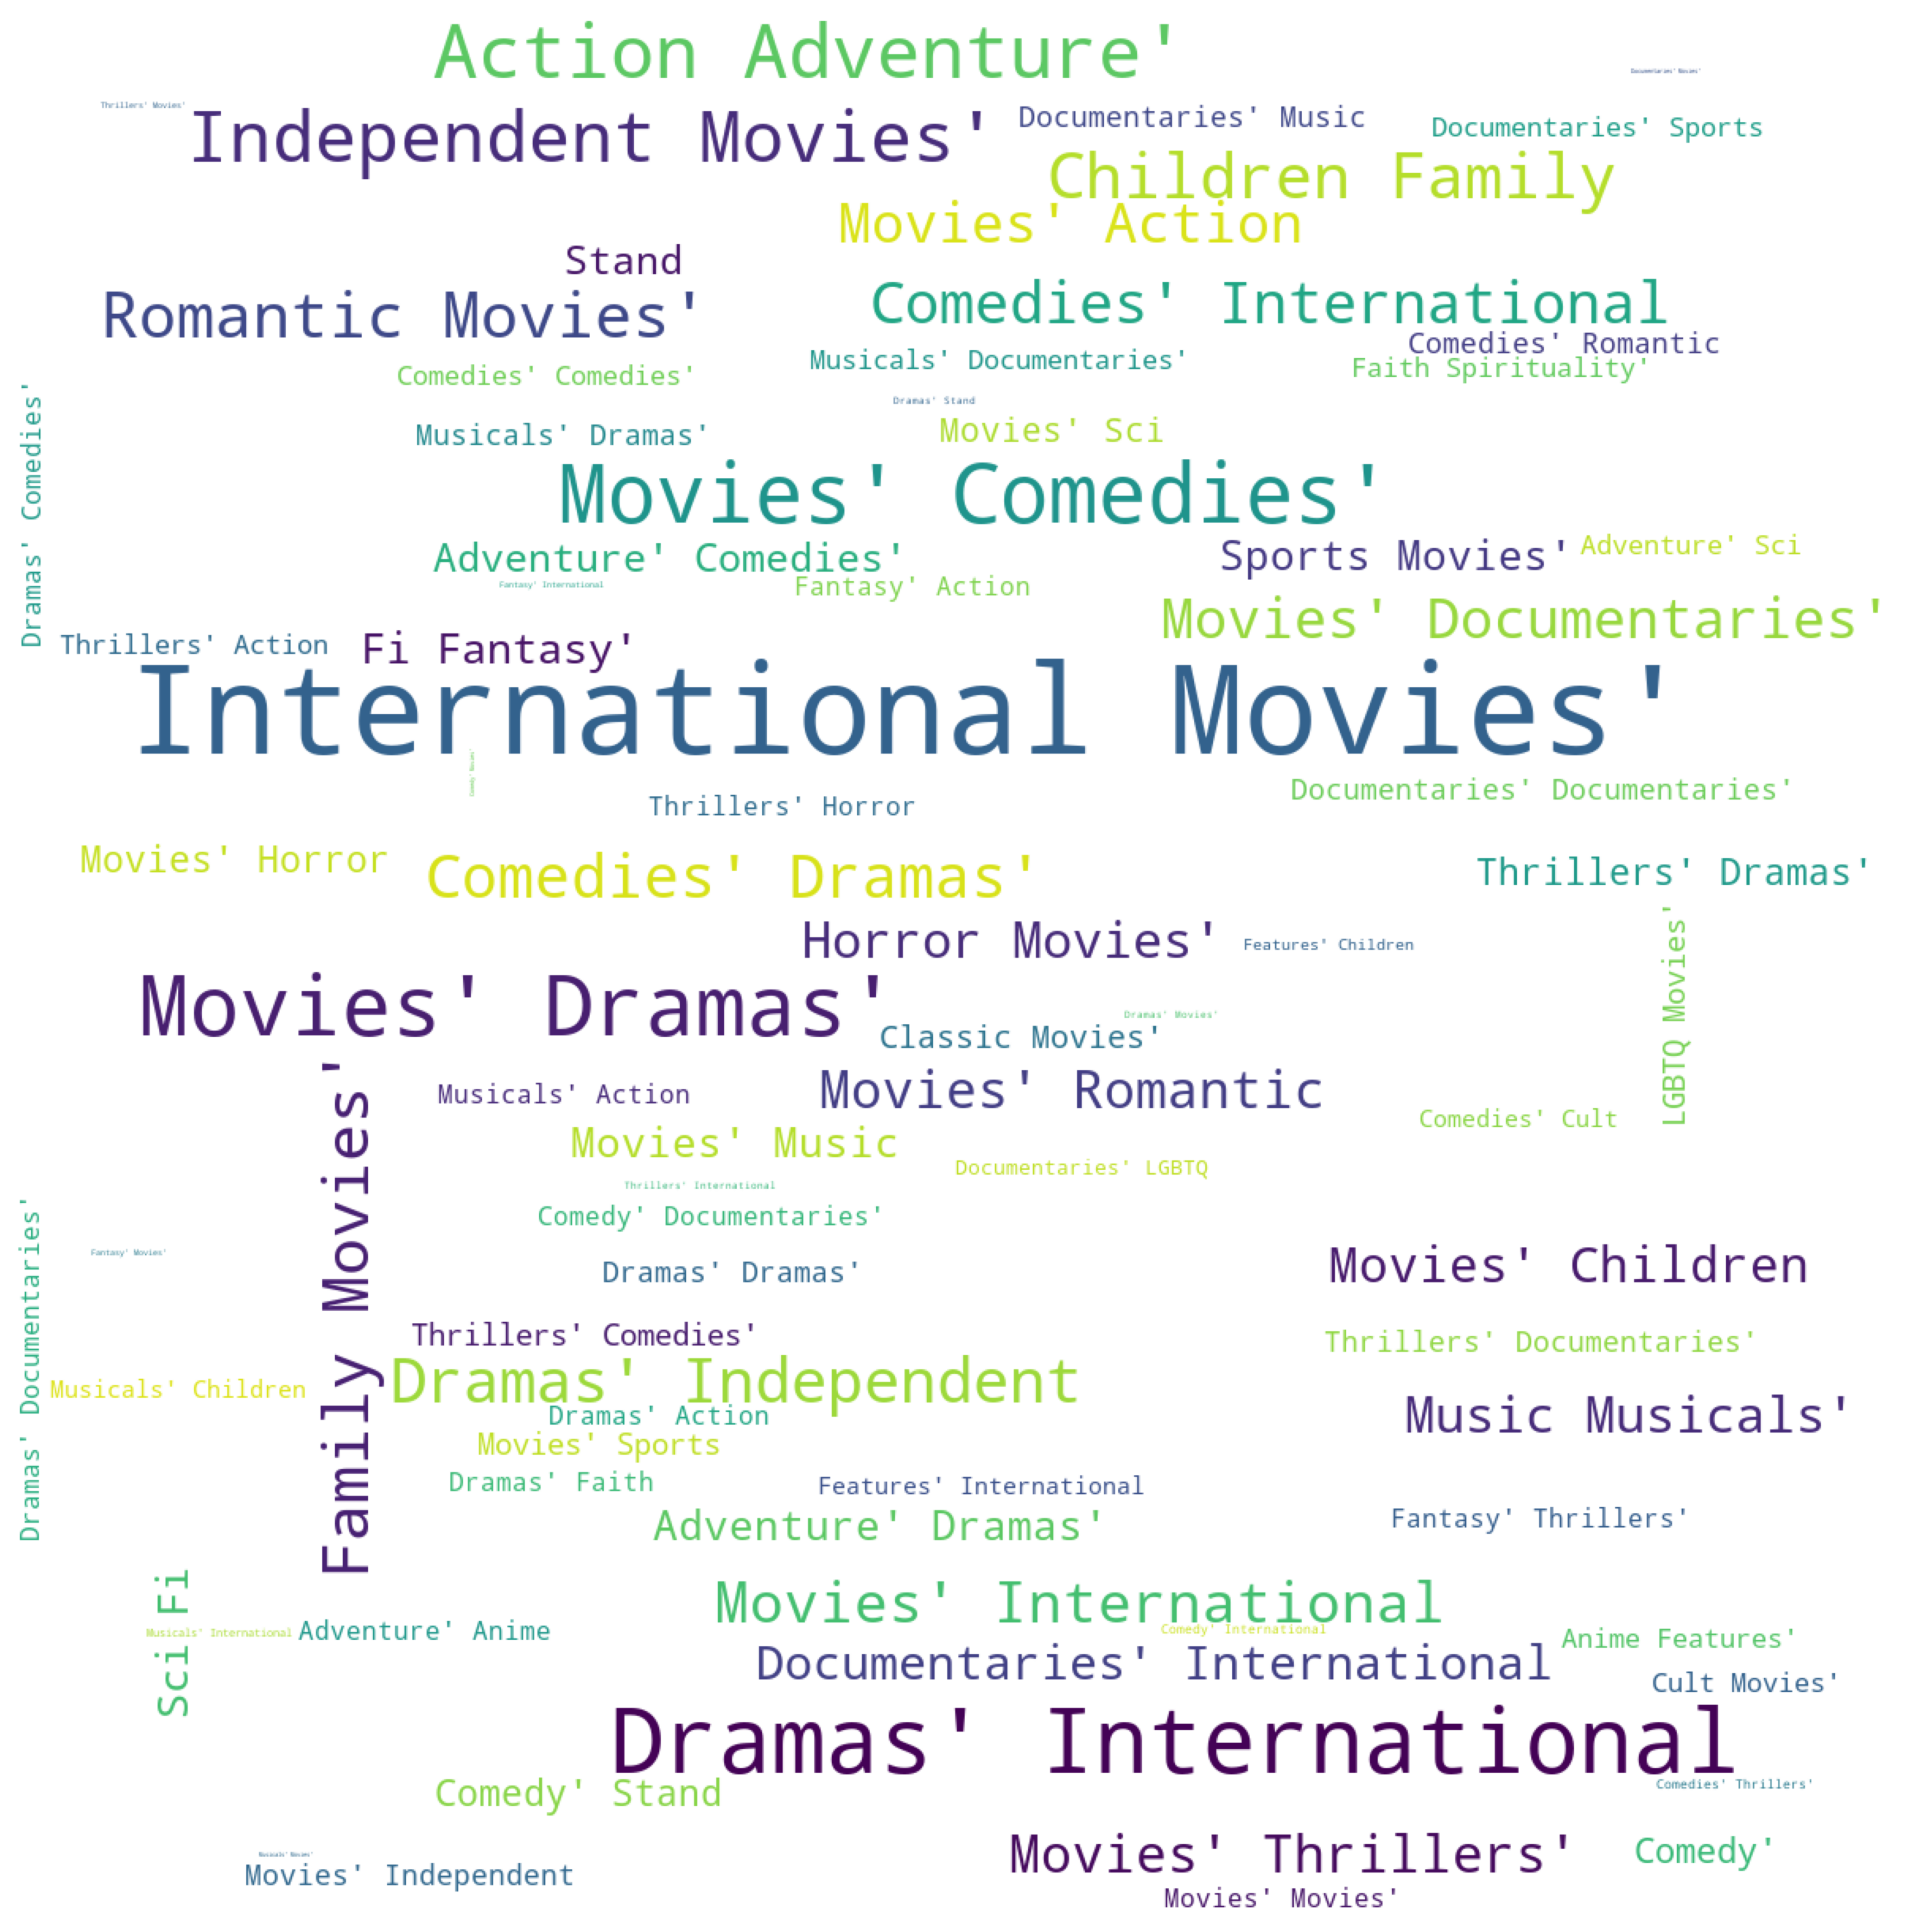

In [39]:
from wordcloud import WordCloud
categories = ", ".join(movie['listed_in']).split(", ")
text = str(categories).replace(',','').replace('[','').replace("''",'').replace(']','')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [41]:
movie_asc = movie.sort_values("release_year", ascending = True)

movie_asc[['title', "release_year"]][:20]

title  release_year
4960                                    Prelude to War          1942
6117                              The Battle of Midway          1942
7616                Why We Fight: The Battle of Russia          1943
7342     Undercover: How to Operate Behind Enemy Lines          1943
7679                   WWII: Report from the Aleutians          1943
6699                                 The Negro Soldier          1944
6657  The Memphis Belle: A Story of a\nFlying Fortress          1944
7268                                  Tunisian Victory          1944
3425                           Know Your Enemy - Japan          1945
5371                                        San Pietro          1945
4436                          Nazi Concentration Camps          1945
3608                                Let There Be Light          1946
7072                                       Thunderbolt          1947
7595                                   White Christmas          1954
6141                                   The Blazing Sun          1954
5122                             Rebel Without a Cause          1955
5425                               Scandal in Sorrento          1955
6868                                 The Sign of Venus          1955
2233                                  Forbidden Planet          1956
1620                                       Dark Waters          1956

In [42]:
tv_asc = tv_show.sort_values("release_year", ascending = True)

tv_asc[['title', "release_year"]][:20]

title  release_year
4867    Pioneers: First Women Filmmakers*          1925
4866  Pioneers of African-American Cinema          1946
6953  The Twilight Zone (Original Series)          1963
6082               The Andy Griffith Show          1967
5785                            Star Trek          1968
4216     Monty Python's Fliegender Zirkus          1972
4217         Monty Python's Flying Circus          1974
1577                           Dad's Army          1977
1949                             El Chavo          1979
4478                        Ninja Hattori          1981
5238                             Robotech          1985
5344                          Saint Seiya          1986
5536                           Shaka Zulu          1986
2739                    Highway to Heaven          1988
2730                            High Risk          1988
6914    The Super Mario Bros. Super Show!          1989
7280                           Twin Peaks          1990
4811                  Pee-wee's Playhouse          1990
3334             Ken Burns: The Civil War          1990
1012       Bob Ross: Beauty Is Everywhere          1991

In [72]:
movie['genre'] = movie['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
movie['principal_genre'] = movie['genre'].apply(lambda genres: genres[0])
top_movies_genres = [
    'International Movies',
    'Dramas',
    'Comedies'
]

In [73]:
year_genre_df = movie[(movie['principal_genre'].isin(top_movies_genres)) & (movie['year_added'] >= 2017)].groupby(['principal_genre', 'year_added']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'year_added', 'count']

fig = px.sunburst(year_genre_df, path=['year_added', 'principal_genre'], values='count')
fig.show()